In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
sentence=['i like egg and bread','i like chocolate and bunnies','i hate onions']

In [5]:
max_vocab_size=20000
tokenizer=Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(sentence)
sequences=tokenizer.texts_to_sequences(sentence)

In [6]:
sequences

[[1, 2, 4, 3, 5], [1, 2, 6, 3, 7], [1, 8, 9]]

In [8]:
tokenizer.word_index

{'i': 1,
 'like': 2,
 'and': 3,
 'egg': 4,
 'bread': 5,
 'chocolate': 6,
 'bunnies': 7,
 'hate': 8,
 'onions': 9}

In [9]:
data=pad_sequences(sequences)

In [10]:
data

array([[1, 2, 4, 3, 5],
       [1, 2, 6, 3, 7],
       [0, 0, 1, 8, 9]])

In [12]:
MAXLEN=5
data=pad_sequences(sequences,maxlen=MAXLEN)
data

array([[1, 2, 4, 3, 5],
       [1, 2, 6, 3, 7],
       [0, 0, 1, 8, 9]])

In [13]:
data=pad_sequences(sequences,maxlen=MAXLEN,padding='post')
data

array([[1, 2, 4, 3, 5],
       [1, 2, 6, 3, 7],
       [1, 8, 9, 0, 0]])

In [15]:
data=pad_sequences(sequences,maxlen=MAXLEN,padding='pre')
print(data)

[[1 2 4 3 5]
 [1 2 6 3 7]
 [0 0 1 8 9]]


In [16]:
MAXLEN=4
data=pad_sequences(sequences,maxlen=MAXLEN)
print(data)

[[2 4 3 5]
 [2 6 3 7]
 [0 1 8 9]]


In [17]:
data=pad_sequences(sequences,maxlen=MAXLEN,truncating='post')
print(data)

[[1 2 4 3]
 [1 2 6 3]
 [0 1 8 9]]


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,LSTM,GlobalMaxPooling1D,Embedding
import tensorflow as tf; 
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns=['labels','messages']

In [8]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['b_labels']=df['labels'].map({'ham':0,'spam':1})

In [10]:
df.head()

,labels,messages,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
X=df['messages']
y=df['b_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
max_vocab_size=20000
tokenizer=Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)
sequence_train=tokenizer.texts_to_sequences(X_train)
sequence_test=tokenizer.texts_to_sequences(X_test)

In [13]:
word2vec=tokenizer.word_index

In [14]:
word2vec

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'is': 8,
 'in': 9,
 'my': 10,
 'me': 11,
 'for': 12,
 'it': 13,
 'your': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 'that': 19,
 '2': 20,
 'now': 21,
 'are': 22,
 'not': 23,
 'but': 24,
 'so': 25,
 'ur': 26,
 'do': 27,
 'or': 28,
 'be': 29,
 'can': 30,
 'at': 31,
 'will': 32,
 'get': 33,
 'with': 34,
 'if': 35,
 "i'm": 36,
 'no': 37,
 'we': 38,
 'just': 39,
 'gt': 40,
 'lt': 41,
 'this': 42,
 'ok': 43,
 '4': 44,
 'up': 45,
 'when': 46,
 'from': 47,
 'out': 48,
 'how': 49,
 'know': 50,
 'go': 51,
 'free': 52,
 'like': 53,
 'all': 54,
 'what': 55,
 'good': 56,
 'got': 57,
 'its': 58,
 'come': 59,
 'then': 60,
 'love': 61,
 'was': 62,
 'only': 63,
 'am': 64,
 'he': 65,
 'send': 66,
 'time': 67,
 'day': 68,
 'want': 69,
 'there': 70,
 'text': 71,
 'need': 72,
 'as': 73,
 'going': 74,
 'stop': 75,
 'by': 76,
 'one': 77,
 'txt': 78,
 "i'll": 79,
 'n': 80,
 'k': 81,
 'see': 82,
 'today': 83,
 'back': 84,
 'r': 85

In [15]:
V=len(word2vec)
print(V)

7203


In [16]:
data_train=pad_sequences(sequence_train)
print(data_train)

[[   0    0    0 ... 1777    7 1778]
 [   0    0    0 ...    9    5 3447]
 [   0    0    0 ...   21   25 1468]
 ...
 [   0    0    0 ...   84   10   61]
 [   0    0    0 ...   52   18 1848]
 [   0    0    0 ...   33 7203 1001]]


In [17]:
print(len(data_train))

3733


In [18]:
print(data_train.shape)

(3733, 189)


In [19]:
T=data_train.shape[1]

In [20]:
data_test=pad_sequences(sequence_test,maxlen=T)
print(data_test.shape)

(1839, 189)


In [21]:
#building model
#D-we gate to choose the dimensionalty 
#embedding will start from 1,bcoz 0 is used for padding V+1
#embedding layer is used for creating vectors from integers
D=20

In [22]:
#Hidden stat
M=15

In [23]:
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(data_train,y_train,epochs=10,validation_data=(data_test,y_test))

Epoch 1/10
117/117 [==============================] - 8s 22ms/step - loss: 0.4585 - accuracy: 0.8645 - val_loss: 0.3582 - val_accuracy: 0.8690
Epoch 2/10
117/117 [==============================] - 2s 18ms/step - loss: 0.2942 - accuracy: 0.8645 - val_loss: 0.2081 - val_accuracy: 0.8690
Epoch 3/10
117/117 [==============================] - 2s 18ms/step - loss: 0.1521 - accuracy: 0.9542 - val_loss: 0.1311 - val_accuracy: 0.9728
Epoch 4/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0896 - accuracy: 0.9885 - val_loss: 0.1007 - val_accuracy: 0.9826
Epoch 5/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0609 - accuracy: 0.9930 - val_loss: 0.0978 - val_accuracy: 0.9766
Epoch 6/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0450 - accuracy: 0.9946 - val_loss: 0.0750 - val_accuracy: 0.9826
Epoch 7/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0320 - accuracy: 0.9957 - val_loss: 0.0692 - val_accuracy: 0.9826

<Axes: >

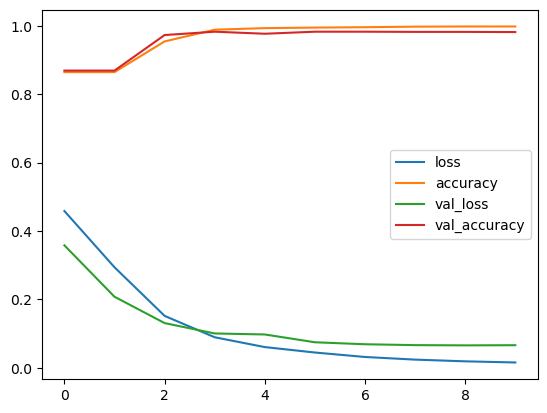

In [25]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [52]:
model.evaluate(data_test,y_test)

58/58 [==============================] - 1s 10ms/step - loss: 0.0736 - accuracy: 0.9782


[0.07363959401845932, 0.9782490730285645]